In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("economic_index.csv")
df.drop(["Unnamed: 0", "year", "month"],axis=1,inplace=True)
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


<Figure size 100x100 with 0 Axes>

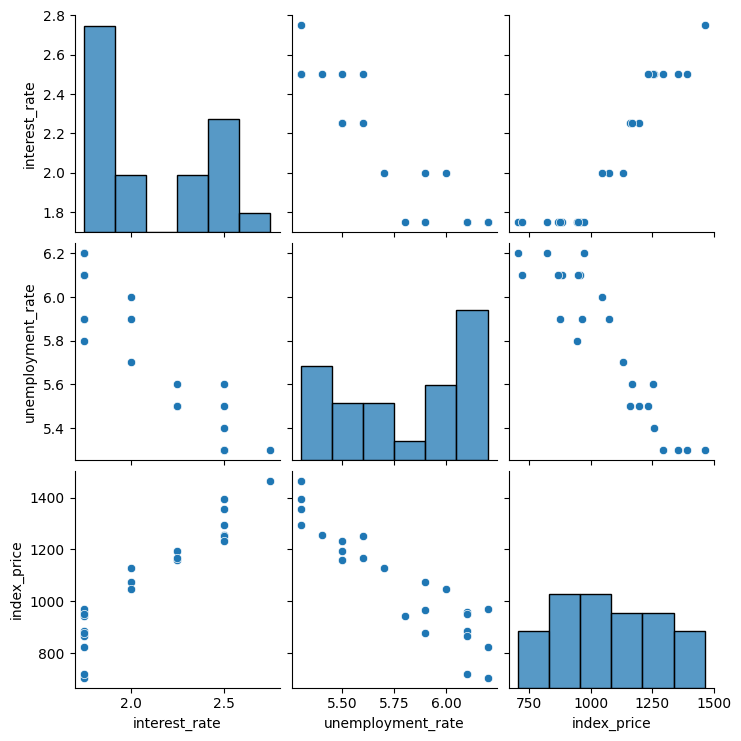

In [6]:
plt.figure(figsize=(1,1))
sns.pairplot(df)

In [7]:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


<Axes: >

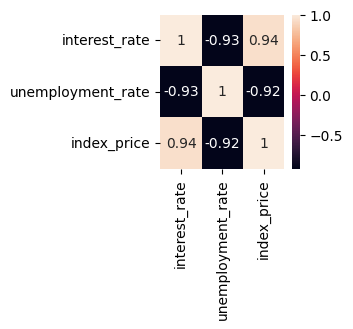

In [8]:
df.corr()
plt.figure(figsize = (2,2))
sns.heatmap(df.corr(),annot=True)

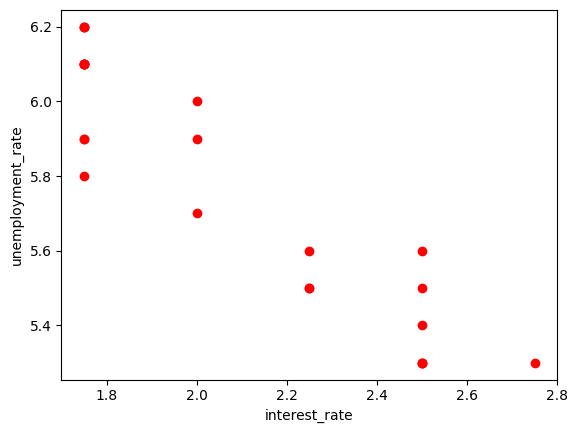

In [9]:
# visualize data more closely
plt.scatter(df["interest_rate"], df["unemployment_rate"], color = "r")
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")
plt.show()

In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
import seaborn as sns

Text(0, 0.5, 'index_price')

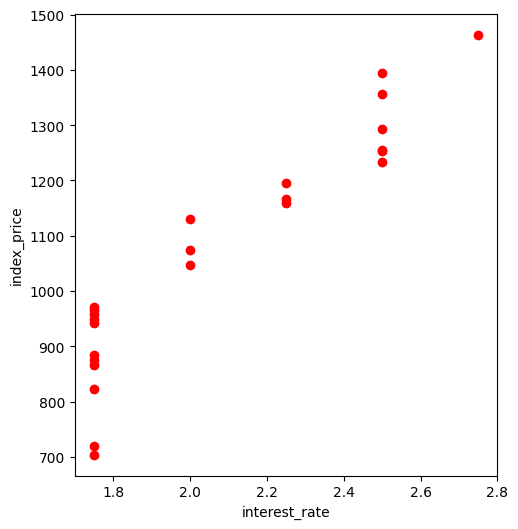

In [13]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df["interest_rate"], df["index_price"], c="red")
plt.xlabel("interest_rate")
plt.ylabel("index_price")

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[140.34286806 -52.55792038]
1086.6666666666667


In [16]:
y_pred = regressor.predict(X_test)

In [17]:
# Import metrices to evaluate the model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("RMSE :", rmse)

Mean Squared Error: 7913.525322008846
Mean Absolute Error: 72.5739441988108
RMSE : 88.95799751573125


In [18]:
from sklearn.metrics import r2_score
acc= r2_score(y_test, y_pred)
print(acc)

0.8313408388278931


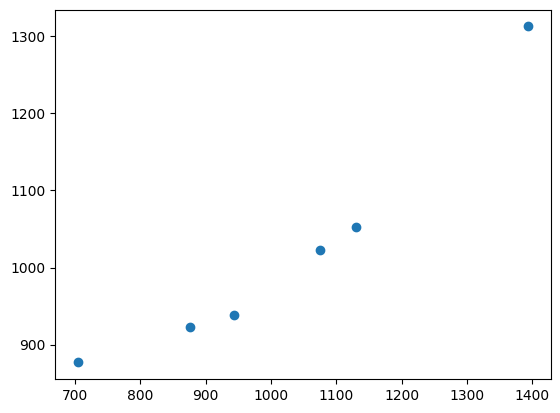

In [19]:
plt.scatter(y_test, y_pred)

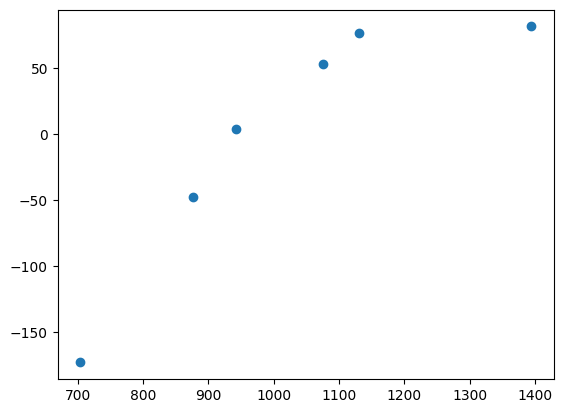

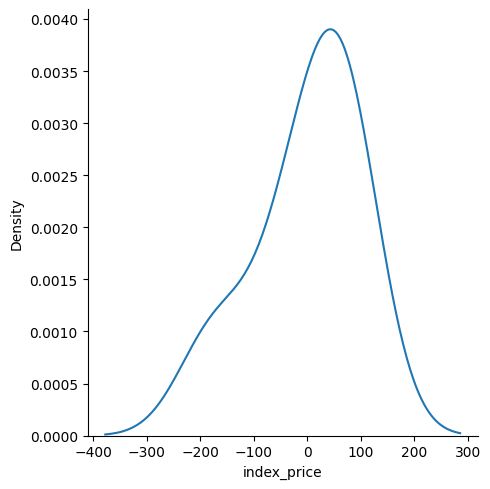

In [20]:
residual = y_test - y_pred
plt.scatter(y_test, residual)
sns.displot(residual, kind = "kde")

In [21]:
residual

,index_price
11,52.883824
10,76.811709
22,-172.877573
14,3.978198
20,-47.485745
1,81.406617
